<a href="https://colab.research.google.com/github/Nyamu007/Completed-Projects/blob/main/aug10speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sun Aug 10 18:40:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 119.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from google.colab import userdata
ROBOFLOW_API = userdata.get('ROBOFLOW_API')

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RdJoHWKE15hA0Lq3QRX3")
project = rf.workspace("road-safety").project("speed-bump-tonyt")
version = project.version(3)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Speed-Bump--3 in yolov12:: 100%|██████████| 4492/4492 [00:00<00:00, 5958.33it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['speed bump']

roboflow:
  workspace: road-safety
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
pip install ultralytics roboflow torch torchvision --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2

In [12]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=30)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Speed-Bump--3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=

Overriding model.yaml nc=2 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       232  ultralytics.nn.modules.conv.Conv             [3, 8, 3, 1]                  
  1                  -1  1      1184  ultralytics.nn.modules.conv.Conv             [8, 16, 3, 2]                 
  2                  -1  1      1248  ultralytics.nn.modules.block.C3              [16, 16, 1]                   
  3                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  4                  -1  2      7424  ultralytics.nn.modules.block.C3              [32, 32, 2]                   
  5                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  6                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  7                  -1  1     73984  ultralytics.

YOLOv12s summary: 149 layers, 778,651 parameters, 778,635 gradients, 9.9 GFLOPs

Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 23.3±7.8 MB/s, size: 40.4 KB)


train: Scanning /content/Speed-Bump--3/train/labels... 1927 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1927/1927 [00:02<00:00, 831.62it/s]


train: New cache created: /content/Speed-Bump--3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2268. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.3±13.3 MB/s, size: 42.4 KB)


val: Scanning /content/Speed-Bump--3/valid/labels... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<00:00, 638.57it/s]

val: New cache created: /content/Speed-Bump--3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 67 weight(decay=0.0), 74 weight(decay=0.0005), 73 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.92G      3.772      4.227      3.876         29        640: 100%|██████████| 121/121 [00:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        217        245   0.000968      0.208    0.00176   0.000353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.36G      2.973      3.846      3.175         21        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        217        245     0.0252     0.0776    0.00859    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.37G      2.646      3.478      2.891         22        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        217        245      0.043      0.171      0.025    0.00577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.38G      2.485      3.186      2.713         25        640: 100%|██████████| 121/121 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        217        245     0.0765     0.0939     0.0209    0.00515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.38G      2.404      3.018      2.638         16        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        217        245      0.109      0.204     0.0756     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.39G      2.332       2.85      2.565         18        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        217        245       0.24      0.224      0.133     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.39G      2.273      2.677      2.477         20        640: 100%|██████████| 121/121 [00:43<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        217        245      0.159      0.159     0.0678     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       4.4G      2.246      2.646      2.459         11        640: 100%|██████████| 121/121 [00:42<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        217        245      0.255      0.269      0.169     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       4.4G      2.208      2.571      2.412         26        640: 100%|██████████| 121/121 [00:43<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        217        245      0.304      0.302      0.205     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.4G      2.139       2.46      2.373         14        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        217        245       0.33       0.38      0.243     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.41G      2.094      2.394       2.32         16        640: 100%|██████████| 121/121 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        217        245      0.298      0.343      0.197     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.41G      2.074      2.314      2.307         12        640: 100%|██████████| 121/121 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        217        245      0.345      0.465      0.309     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.42G       2.05      2.288      2.288         16        640: 100%|██████████| 121/121 [00:42<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        217        245      0.412      0.408      0.345      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.42G      1.993      2.206      2.217         10        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        217        245      0.435      0.429      0.381      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.43G      1.961      2.128      2.202         16        640: 100%|██████████| 121/121 [00:42<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        217        245      0.479      0.408      0.385      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.43G      1.961      2.062      2.177         17        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        217        245      0.554        0.4      0.446      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.44G      1.925       2.05      2.143         17        640: 100%|██████████| 121/121 [00:42<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        217        245      0.454      0.531      0.432      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.44G      1.908      1.973      2.134         19        640: 100%|██████████| 121/121 [00:42<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        217        245      0.509      0.527      0.476       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.45G      1.883      1.958      2.114         17        640: 100%|██████████| 121/121 [00:42<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        217        245      0.524      0.473      0.445      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.45G       1.87      1.922      2.109         27        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        217        245       0.58      0.531      0.543      0.179


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.46G      2.133      1.872      1.947          9        640: 100%|██████████| 121/121 [00:42<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        217        245       0.55      0.539      0.514      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.46G      2.114      1.749      1.897          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        217        245       0.58      0.527      0.553        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.47G      2.081      1.707      1.857          7        640: 100%|██████████| 121/121 [00:41<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        217        245      0.588      0.577      0.566        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.47G      2.038       1.67      1.857          7        640: 100%|██████████| 121/121 [00:41<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        217        245      0.591      0.543      0.567      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.48G      2.018      1.606      1.821          9        640: 100%|██████████| 121/121 [00:41<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        217        245      0.574      0.578      0.586      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.48G      2.002      1.555      1.784          7        640: 100%|██████████| 121/121 [00:41<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        217        245      0.629      0.563      0.597      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.49G      1.959      1.528      1.781          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        217        245      0.617      0.598      0.613      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.49G      1.957      1.488      1.794          8        640: 100%|██████████| 121/121 [00:41<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        217        245      0.648       0.58      0.616      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       4.5G      1.957      1.471      1.769          8        640: 100%|██████████| 121/121 [00:41<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        217        245      0.662      0.591      0.644      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       4.5G      1.926      1.451      1.732          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        217        245      0.686      0.588      0.659      0.261



30 epochs completed in 0.377 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 2.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 2.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 82 layers, 775,763 parameters, 0 gradients, 9.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        217        245      0.684      0.592      0.658      0.261
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


In [13]:
!ls yolov12s.yaml  # Colab/Jupyter

yolov12s.yaml


In [14]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2420.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2421.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2422.jpg  weights


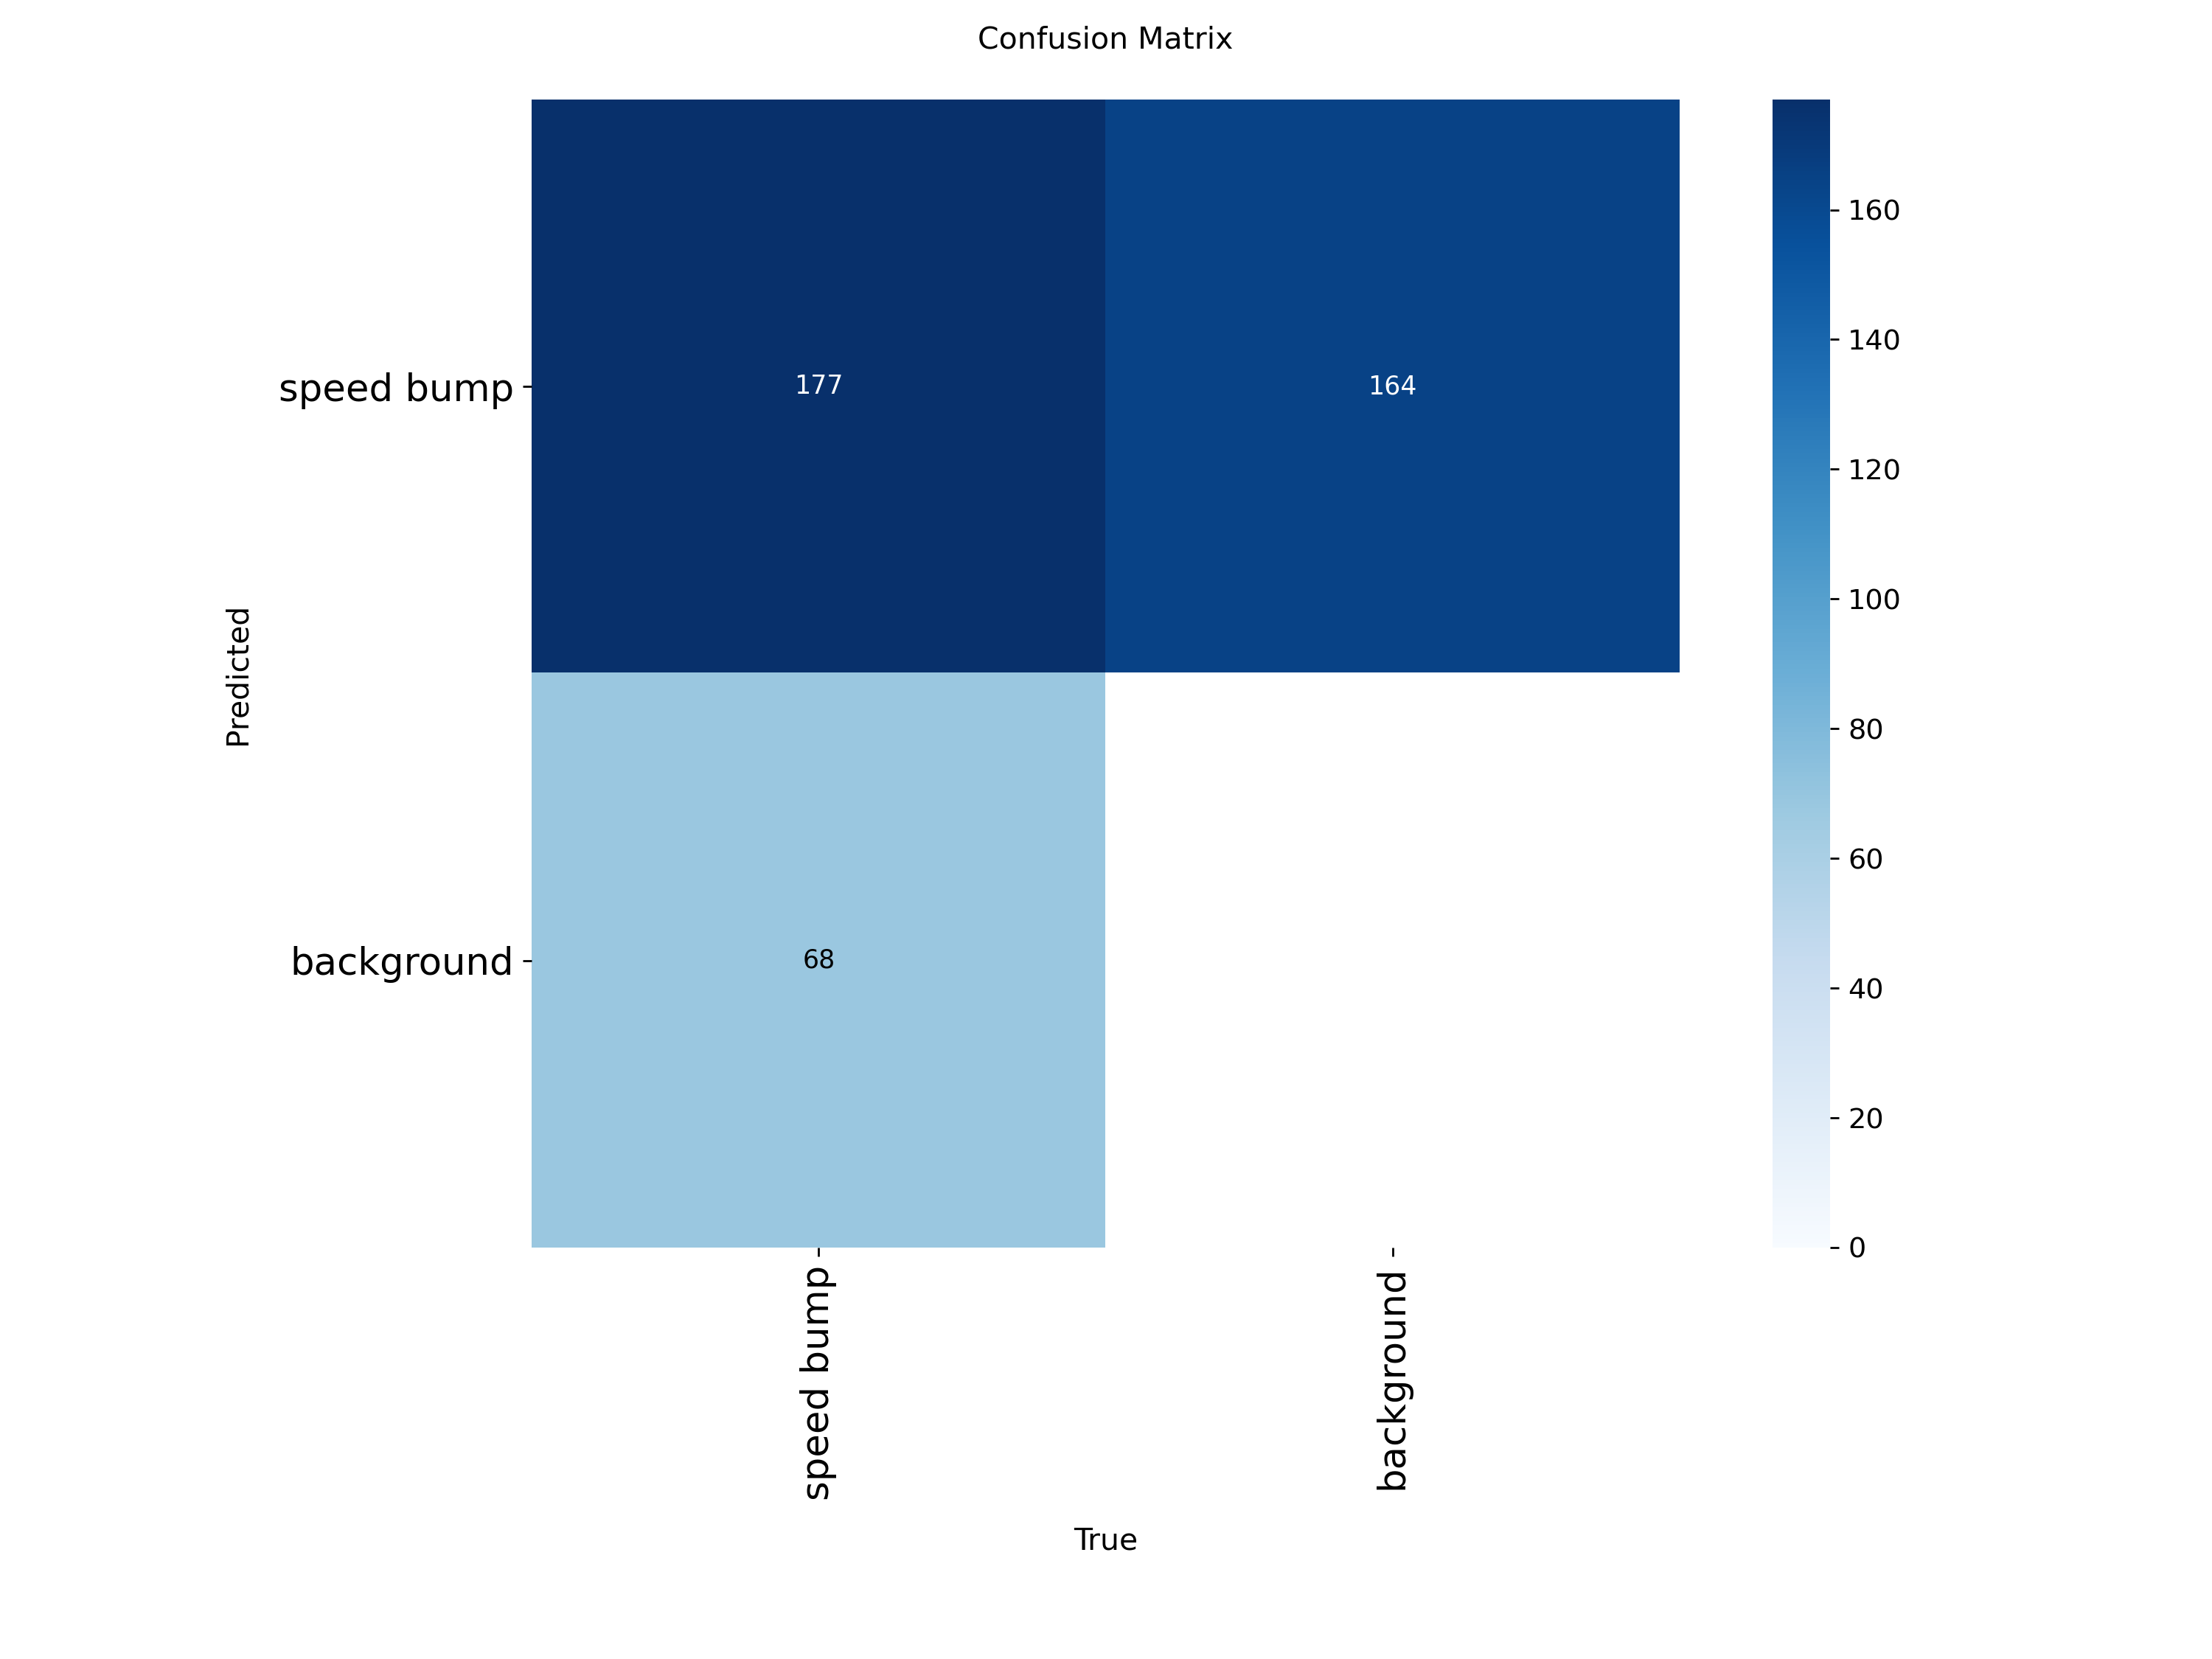

In [15]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

In [16]:

import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2420.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2421.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2422.jpg  weights


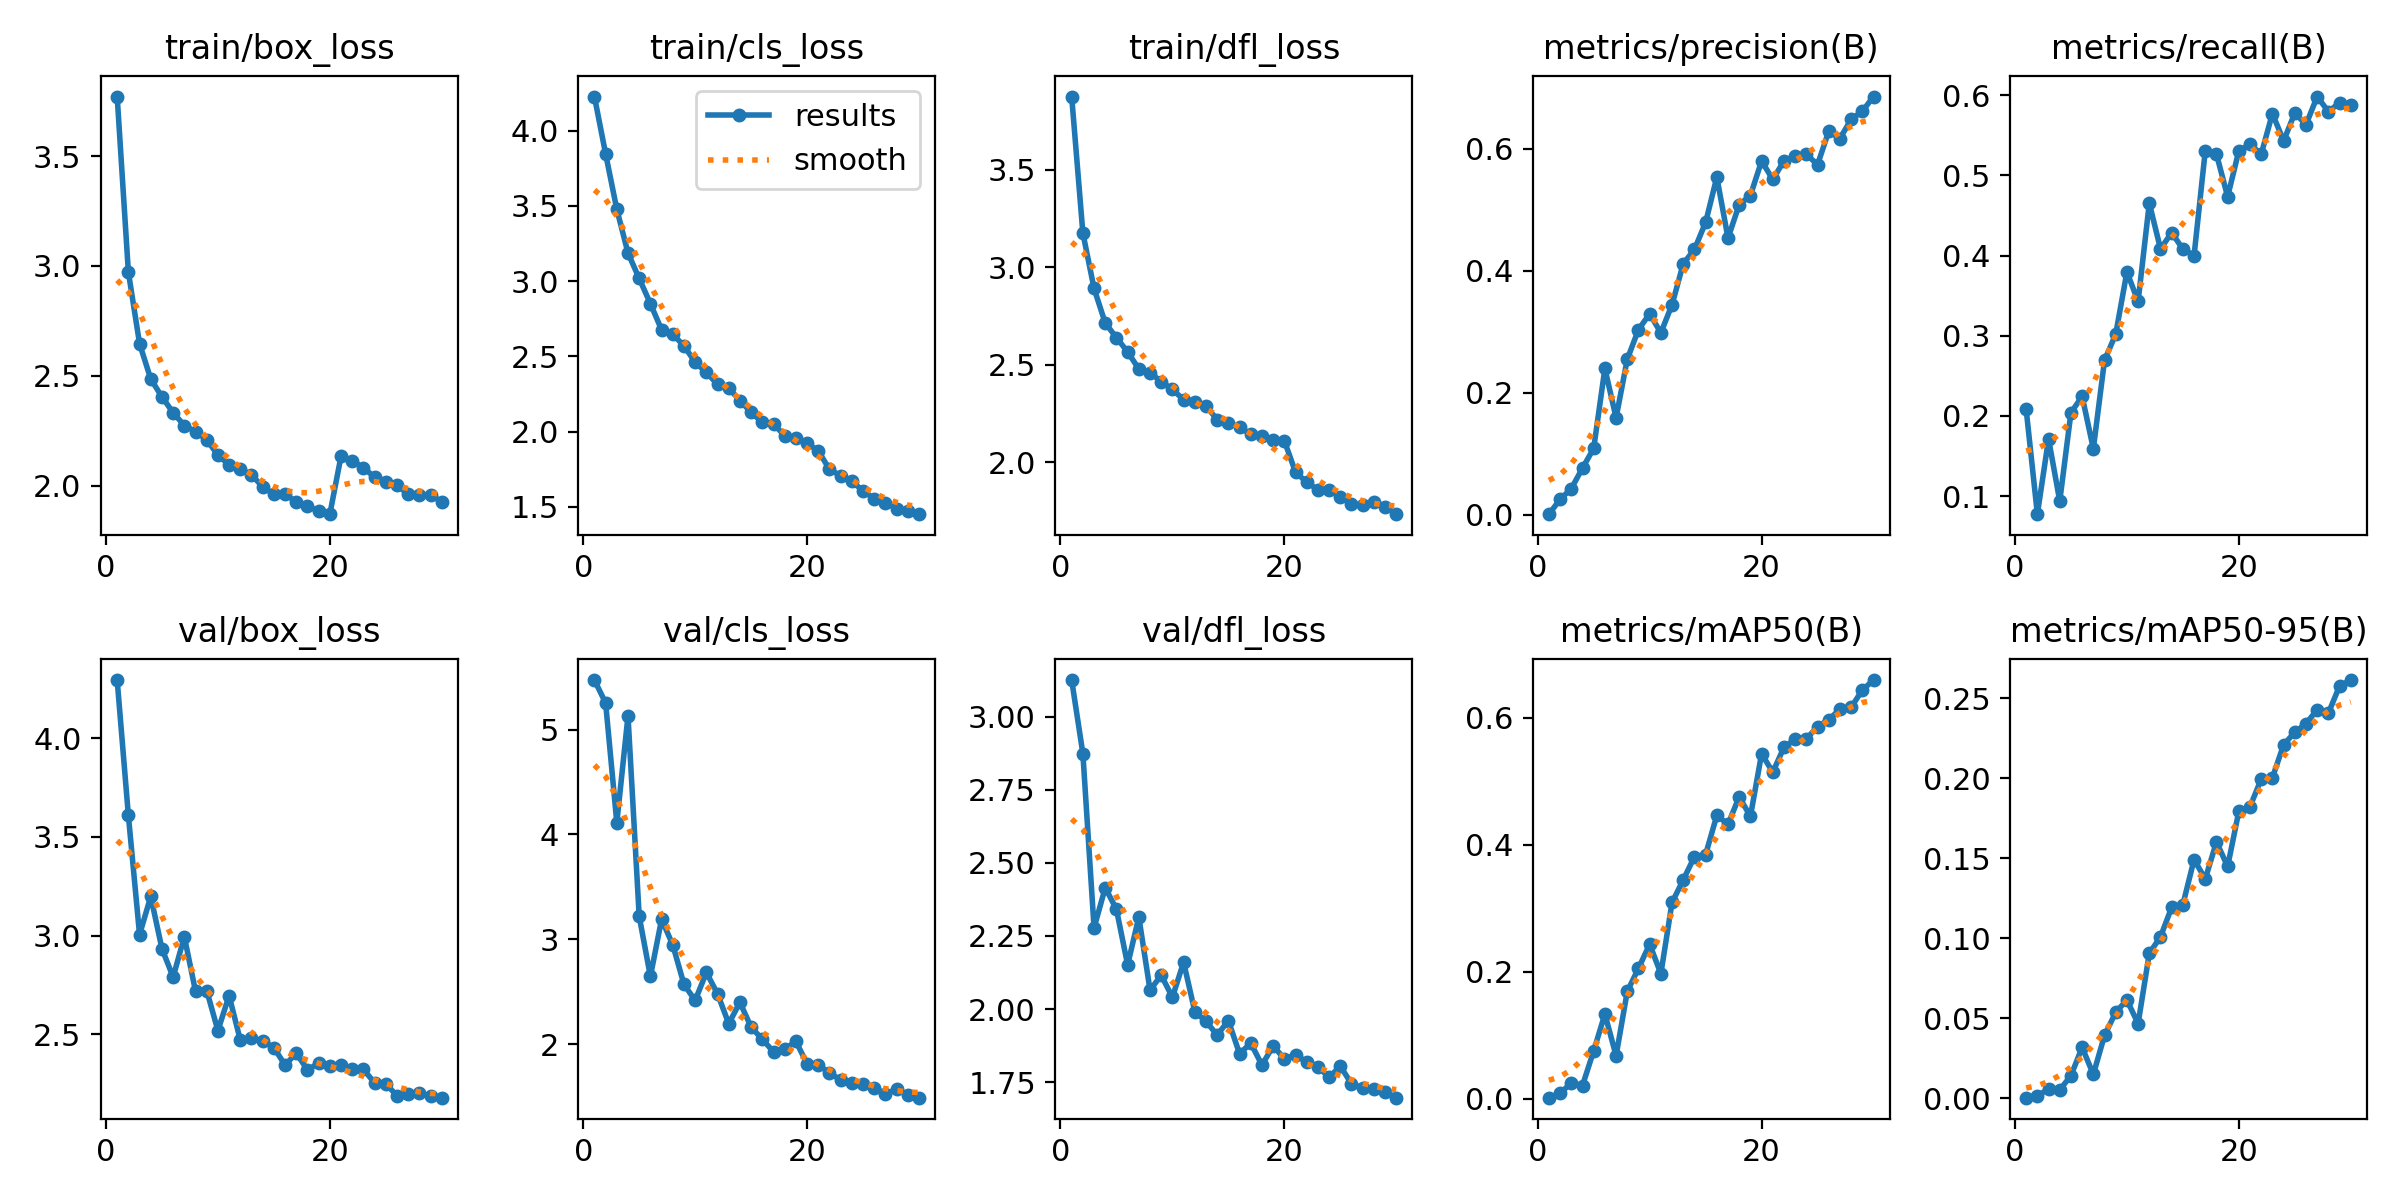

In [17]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [18]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['speed bump']

In [19]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [20]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.26986854609922184
mAP 50 0.640226017449387
mAP 75 0.15778011970760386


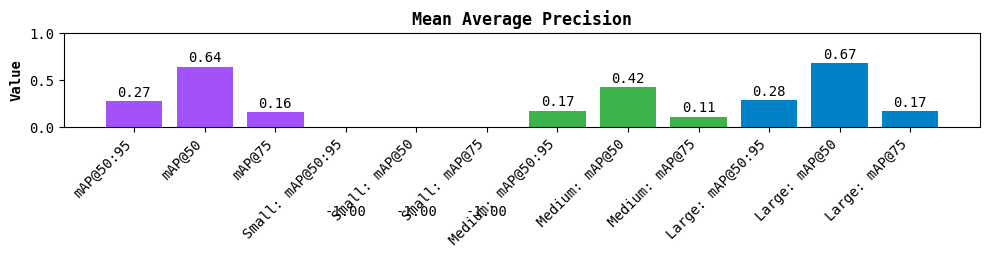

In [21]:
map.plot()

In [22]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml")

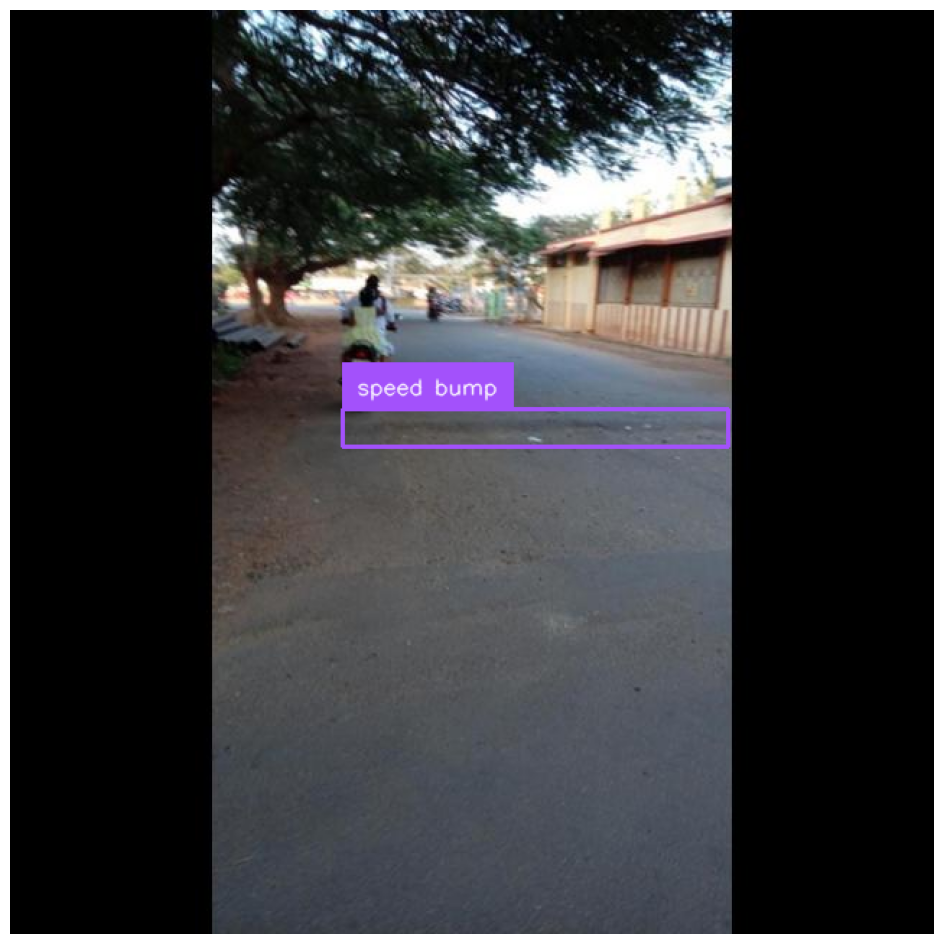

In [27]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [28]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/e.webm"
TARGET_VIDEO_PATH = "/content/eannotated.mp4"

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize BoxAnnotator
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color_lookup=sv.ColorLookup.CLASS
)

# 4. Load YOLOv8 model
model = YOLO(model)

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)

        # Filter only class 0 (Potholes)
        pothole_detections = detections[detections.class_id == 0]

        # Annotate bounding boxes
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=pothole_detections
        )

        # (Optional) Add confidence labels manually
        for detection, confidence in zip(pothole_detections.xyxy, pothole_detections.confidence):
            x1, y1, _, _ = map(int, detection)
            label = f"Pothole {confidence:.2f}"
            cv2.putText(
                annotated_frame,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Processing video:   0%|          | 0/1477 [00:00<?, ?it/s]


TypeError: 'MeanAveragePrecisionResult' object is not callable

In [29]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/w.mp4"  # Your input video
TARGET_VIDEO_PATH = "/content/wannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Exception: Could not open video at /content/w.mp4

In [ ]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/p.webm"  # Your input video
TARGET_VIDEO_PATH = "/content/pannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

In [31]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files
import numpy as np

# Configuration
SOURCE_VIDEO_PATH = "/content/r.webm"  # Update with your video path
TARGET_VIDEO_PATH = "/content/rspeedbump_detection_output.mp4"
MODEL_PATH = "/content/runs/detect/train/weights/best.pt"  # Your trained model
CONFIDENCE_THRESHOLD = 0.5  # Adjust based on your model's performance
SPEEDBUMP_CLASS_ID = 0  # Verify this matches your model's class ID for speed bumps

# Initialize components
model = YOLO(MODEL_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Custom annotators (Green boxes for better visibility)
box_annotator = sv.BoxAnnotator(
    color=sv.Color(r=0, g=255, b=0),  # Green color
    thickness=2,
    text_scale=0.5,
    text_thickness=1
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color(255, 255, 255),  # White text
    text_scale=0.6,
    text_thickness=1,
    text_padding=5
)

# Processing pipeline
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing Video"):
        # Run inference
        results = model(frame, imgsz=640, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)

        # Filter only speed bumps with high confidence
        speedbump_detections = detections[
            (detections.class_id == SPEEDBUMP_CLASS_ID) &
            (detections.confidence > CONFIDENCE_THRESHOLD)
        ]

        # Create informative labels with size information
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

# Results
print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")
files.download(TARGET_VIDEO_PATH)  # Auto-download in Colab

TypeError: BoxAnnotator.__init__() got an unexpected keyword argument 'text_scale'

In [ ]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/r.mp4"  # Your input video
TARGET_VIDEO_PATH = "/content/rannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

In [ ]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/y.webm"  # Your input video
TARGET_VIDEO_PATH = "/content/yannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

In [32]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/e.webm"  # Your input video
TARGET_VIDEO_PATH = "/content/yannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Model classes: {0: 'speed bump'}


Processing video: 100%|█████████▉| 1476/1477 [00:26<00:00, 55.31it/s]


✅ Processing complete! Output saved to /content/yannotated_speedbumps.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/p.webm"  # Your input video
TARGET_VIDEO_PATH = "/content/pannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Model classes: {0: 'speed bump'}


Processing video: 100%|██████████| 480/480 [00:08<00:00, 56.32it/s]


✅ Processing complete! Output saved to /content/pannotated_speedbumps.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/r.webm"  # Your input video
TARGET_VIDEO_PATH = "/content/rannotated_speedbumps.mp4"  # Output video
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt') # Your speed bump model

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize annotators
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color=sv.Color(r=0, g=255, b=0)  # Green boxes for speed bumps
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.WHITE,
    text_scale=0.5,
    text_thickness=1
)

# 4. Load YOLOv8 model
model = YOLO(model)
print("Model classes:", model.names)  # Verify speed bump class index

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # Filter only speed bumps (adjust class_id if needed)
        speedbump_detections = detections[detections.class_id == 0]  # Assuming class 0 is speed bumps

        # Create labels with confidence and size
        labels = [
            f"Speed Bump {conf:.2f} | W:{w:.1f},H:{h:.1f}"
            for conf, (x1, y1, x2, y2) in zip(
                speedbump_detections.confidence,
                speedbump_detections.xyxy
            )
            for w, h in [(x2-x1, y2-y1)]  # Calculate width and height
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Model classes: {0: 'speed bump'}


Processing video: 100%|██████████| 359/359 [00:05<00:00, 63.21it/s]


✅ Processing complete! Output saved to /content/rannotated_speedbumps.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>